In [1]:
import os, sys, time
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from importlib import reload

import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import homogeneity_score


import common
import DimensionalityReduction.DimensionalityReductionDatasets as dr_datasets
from data.generated.generated_data import get_noisy_nonlinear_with_non_noisy_labels

title_fontsize = 24
fontsize = 24
legend_fontsize = 18
default_figure_size = (15, 8)

DATASET = "Generated Non-Linear"

/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [3]:
X_train_gnnl, X_test_gnnl, y_train_gnnl, y_test_gnnl, y_test_non_noisy_gnnl =\
get_noisy_nonlinear_with_non_noisy_labels()

reload(dr_datasets)
ica_gnnl = dr_datasets.get_gnnl_ica()

Running ICA for 10 components


/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [4]:
ica_gnnl.shape[1]

4

In [5]:
reload(common)
n = ica_gnnl.shape[1]
distortions, davies_bouldin_scores, silhouette_scores, calinski_harabasz_scores, times =\
common.compute_kmeans_scores(ica_gnnl, n)

For n_clusters = 2 average silhouette_score: 0.8914253732179489 time taken: 0.1292123794555664s
For n_clusters = 3 average silhouette_score: 0.8344334615009373 time taken: 0.08010411262512207s
For n_clusters = 4 average silhouette_score: 0.8176958790241016 time taken: 0.14867663383483887s


/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


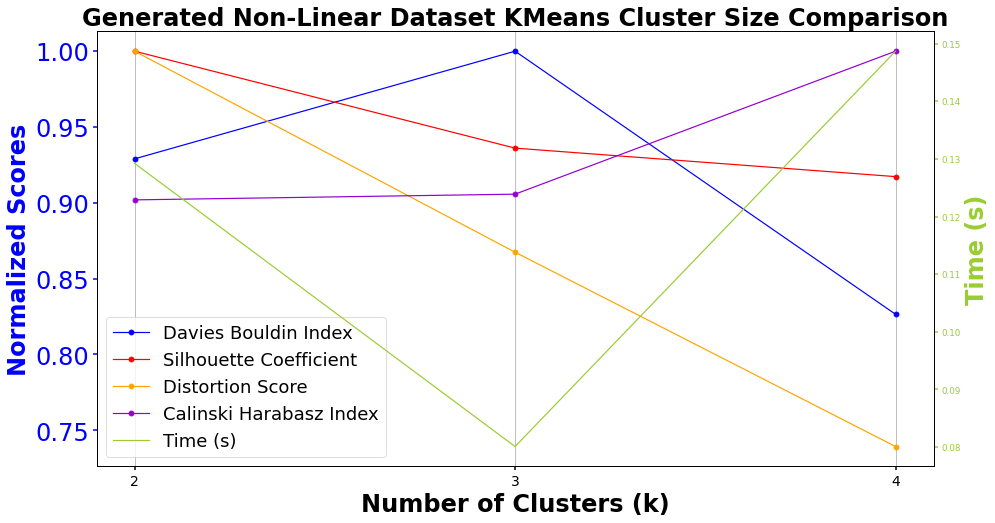

In [40]:
common.plot_kmeans_all(distortions, davies_bouldin_scores, silhouette_scores, calinski_harabasz_scores, times, DATASET, tick_spacing=1)

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:109: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


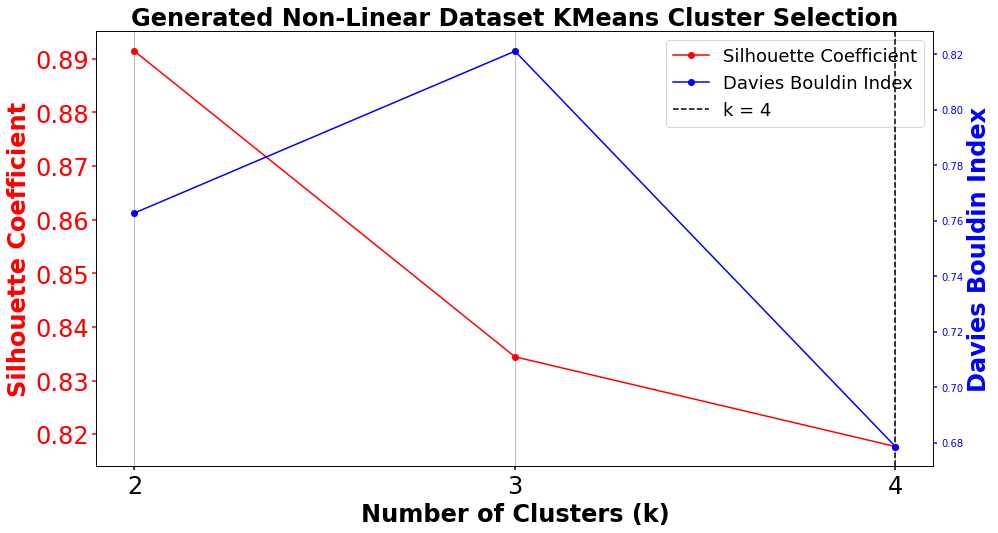

In [17]:
reload(common)
best_k = 4
common.plot_kmeans_selection(davies_bouldin_scores, silhouette_scores, best_k=best_k, DATASET=DATASET, tick_spacing=1)

For n_clusters = 4 average silhouette_score: 0.8176958790241016 time taken: 0.12122297286987305s


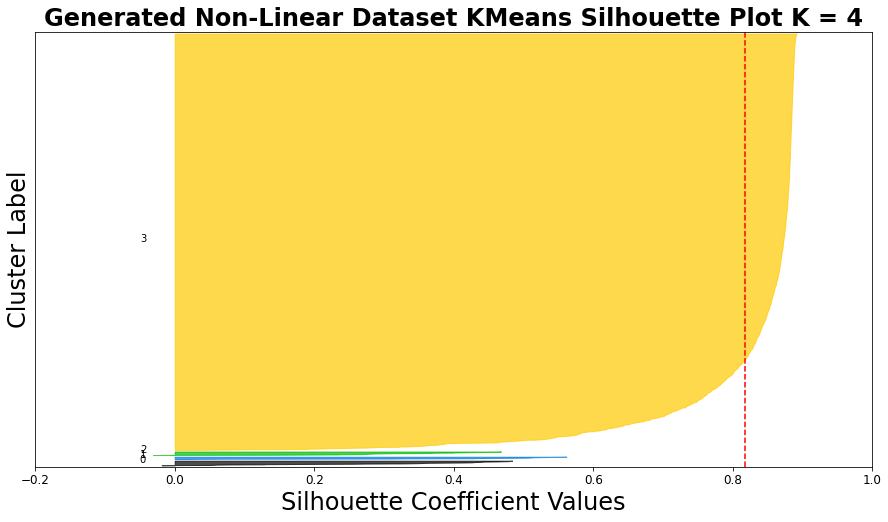

In [18]:
reload(common)
common.plot_silhouette_kmeans(ica_gnnl, best_k, DATASET, xlim=[-0.2, 1.0])

In [20]:
y_train_gnnl_df = pd.DataFrame(y_train_gnnl, columns=["data_labels"])

start_time = time.time()
km = KMeans(n_clusters=best_k, **common.km_arguements)
km.fit(ica_gnnl)
end_time = time.time()
print("Time Taken {} s".format(end_time - start_time))
y_train_gnnl_df['km_labels']=km.labels_
ica_gnnl_km = pd.DataFrame(ica_gnnl.copy())
ica_gnnl_km['km_labels'] = km.labels_

print("homogeneity_score: ", homogeneity_score(km.labels_, y_train_gnnl))

Time Taken 0.12904095649719238 s
homogeneity_score:  0.01517343256792553


In [21]:
# Create a t-SNE model with learning rate 50
m = TSNE(perplexity=30, learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(ica_gnnl)
y_train_gnnl_df['x'] = tsne_features[:,0]
y_train_gnnl_df['y'] = tsne_features[:,1]

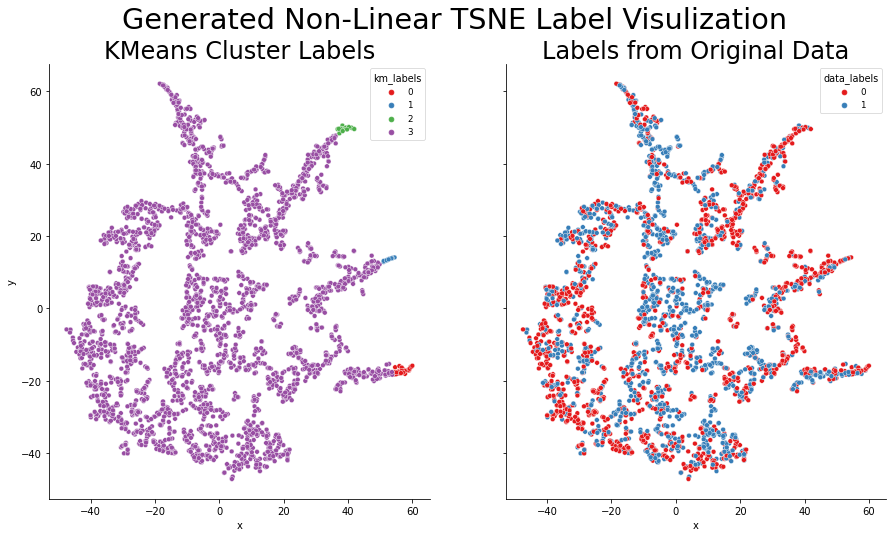

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=default_figure_size, sharey=True)

sns.set_context("paper", rc={"font.size": fontsize, "axes.titlesize": fontsize, "axes.labelsize": fontsize})

sns.scatterplot(x="x", y="y", hue="km_labels", data=y_train_gnnl_df, palette="Set1", ax=ax1)
sns.scatterplot(x="x", y="y", hue="data_labels", data=y_train_gnnl_df, palette="Set1", ax=ax2)

fig.suptitle("{} TSNE Label Visulization".format(DATASET))
ax1.set_title("KMeans Cluster Labels")
ax2.set_title("Labels from Original Data")
sns.despine(fig)

plt.show()

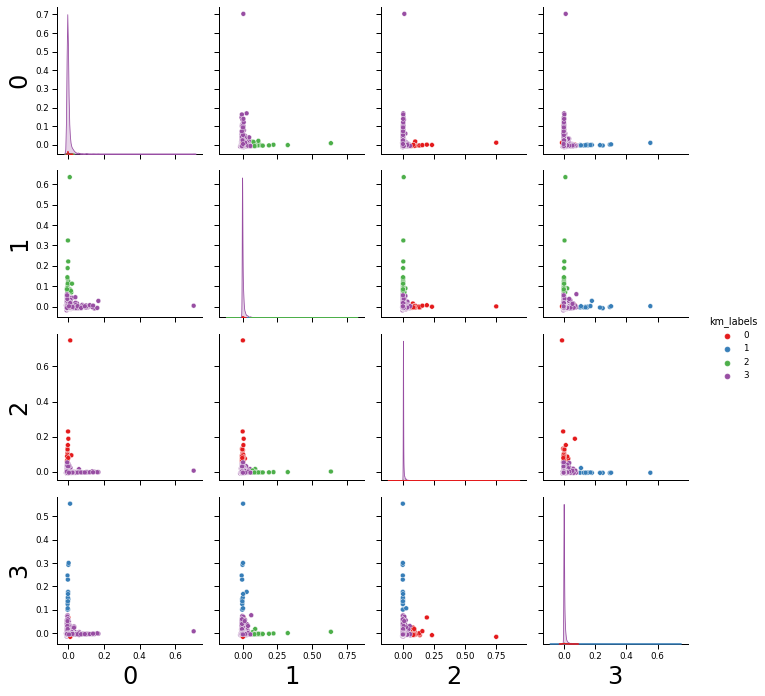

In [23]:
sns.pairplot(ica_gnnl_km, hue="km_labels", palette="Set1")

# Expectation Maximization

In [31]:
reload(common)
em_n = ica_gnnl.shape[1]
n_components = np.arange(2, em_n)
davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, times_em =\
common.compute_em_scores(ica_gnnl, em_n)

For n_clusters = 2 average silhouette_score: 0.4960698133685495 time taken: 0.40646958351135254s
For n_clusters = 3 average silhouette_score: 0.31721425878687814 time taken: 0.17118501663208008s
For n_clusters = 4 average silhouette_score: 0.3077038812981575 time taken: 0.29976439476013184s


/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:250: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


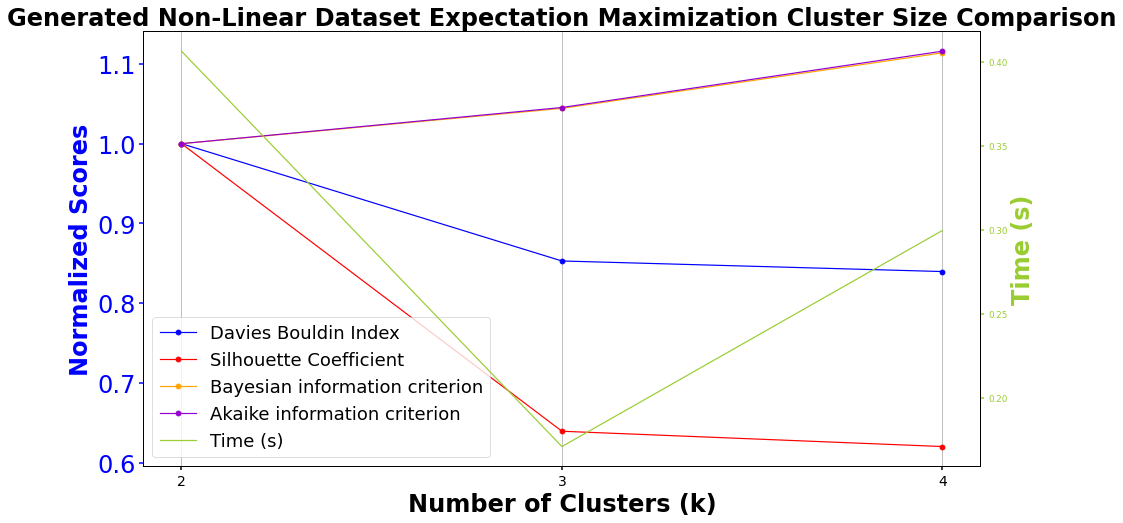

In [32]:
reload(common)
common.plot_em_all(davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, times_em, DATASET)

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:301: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


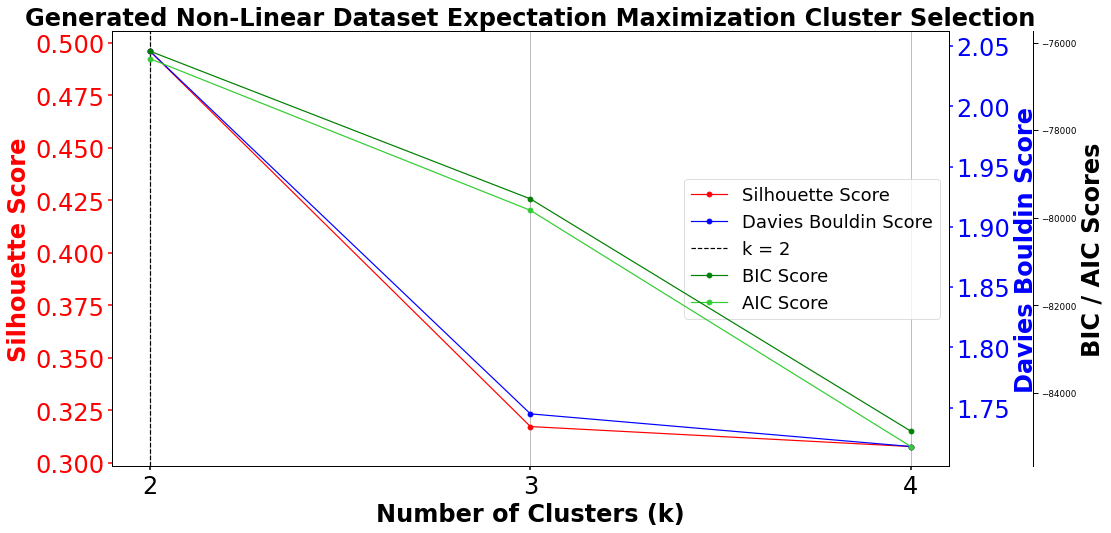

In [39]:
reload(common)
best_k = 2
common.plot_em_selection(davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, best_k, DATASET, tick_spacing=1)

For n_clusters = 2 average silhouette_score: 0.4960698133685495 time taken: 0.13028645515441895s


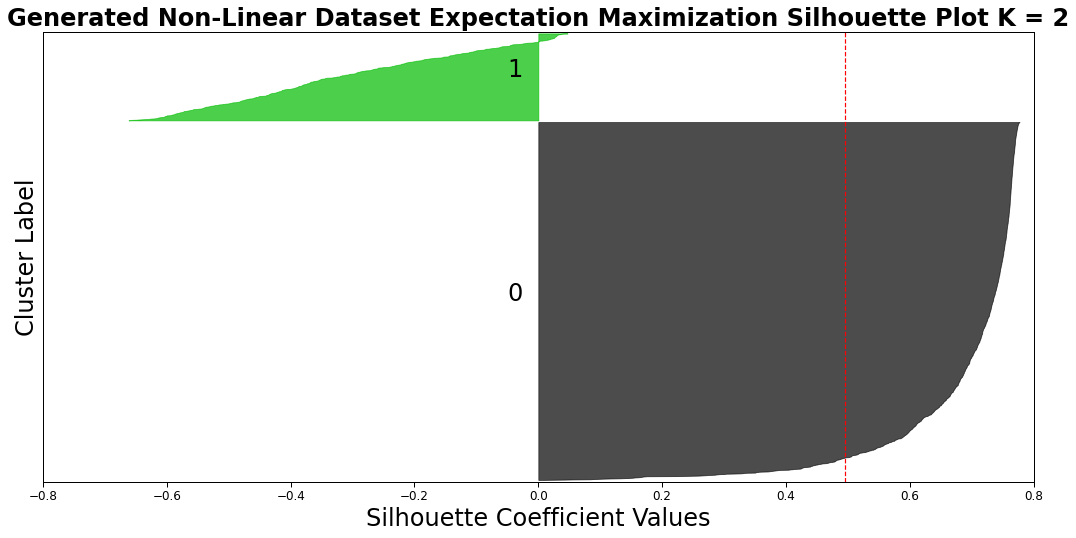

In [34]:
reload(common)
best_k=2
common.plot_silhouette_em(ica_gnnl, best_k, DATASET, xlim=[-0.8, 0.8])

In [35]:
y_train_gnnl_df = pd.DataFrame(y_train_gnnl, columns=["data_labels"])

start_time = time.time()
em_model = GaussianMixture(best_k, **common.em_arguements)
em_model.fit(ica_gnnl)
end_time = time.time()
print("time taken {} s".format(end_time-start_time))
y_train_gnnl_df['em_labels']=em_model.predict(ica_gnnl)
ica_gnnl_em = pd.DataFrame(ica_gnnl.copy())
ica_gnnl_em['em_labels'] = em_model.predict(ica_gnnl)

print("homogeneity_score: ", homogeneity_score(em_model.predict(ica_gnnl), y_train_gnnl))


time taken 0.5429530143737793 s
homogeneity_score:  8.265970529427768e-05


In [36]:
# Create a t-SNE model with learning rate 50
m = TSNE(perplexity=30, learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(ica_gnnl)
y_train_gnnl_df['x'] = tsne_features[:,0]
y_train_gnnl_df['y'] = tsne_features[:,1]

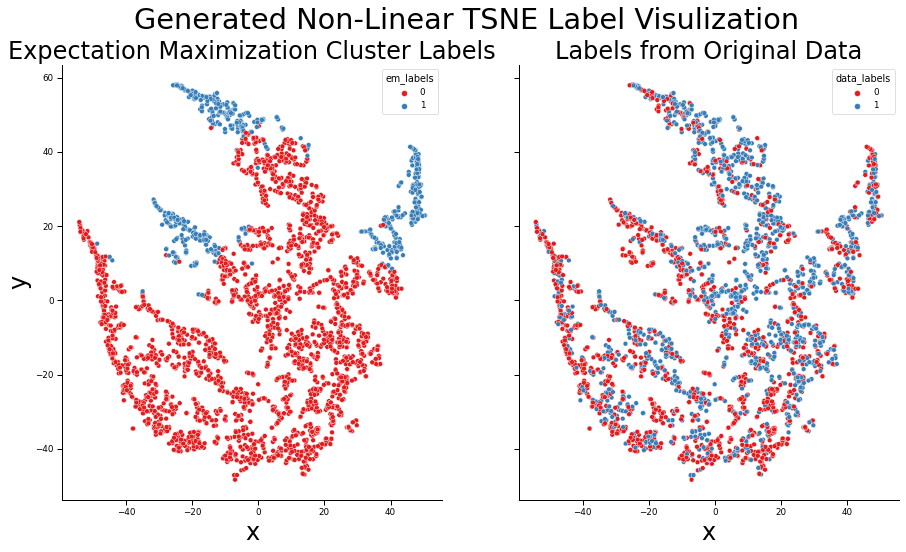

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=default_figure_size, sharey=True)

sns.set_context("paper", rc={"font.size": fontsize, "axes.titlesize": fontsize, "axes.labelsize": fontsize})

sns.scatterplot(x="x", y="y", hue="em_labels", data=y_train_gnnl_df, palette="Set1", ax=ax1)
sns.scatterplot(x="x", y="y", hue="data_labels", data=y_train_gnnl_df, palette="Set1", ax=ax2)

fig.suptitle("{} TSNE Label Visulization".format(DATASET))
ax1.set_title("Expectation Maximization Cluster Labels")
ax2.set_title("Labels from Original Data")
sns.despine(fig)

plt.show()

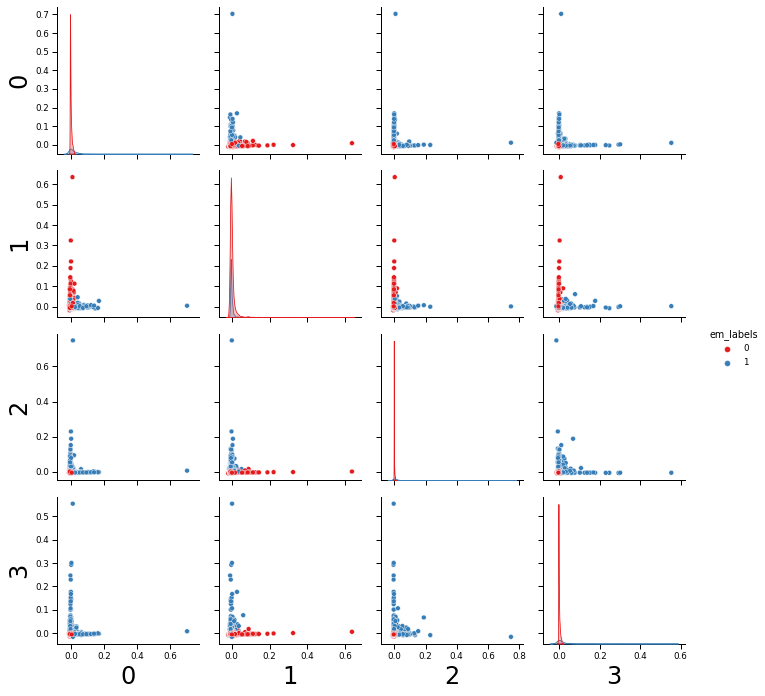

In [38]:
sns.pairplot(ica_gnnl_em, hue="em_labels", palette="Set1")